# Let's plot some Trees !

### Importing the Dataset from 'csv' file 

In [3]:
import pandas as pd 
df=pd.read_csv("titanic-passengers.csv",sep=';')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### Preprocessing the Data

In [5]:
# the sume of missing values in each column 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data['Embarked']=new_data.Embarked.fillna('S')
    return new_data
ndf=preprocess_data(df)

In [7]:
ndf.isnull().sum().sum()

0

In [8]:
ndf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


### Decision Tree prediction 

In [9]:
# Importing relevant Libreries 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
#Features extraction
x=ndf.drop(["PassengerId","Survived","Name","Ticket","Cabin","Embarked"],axis=1)
y=ndf["Survived"]

In [11]:
# Spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5) # Spliting data with 25% test size

In [12]:
# Applying Tree algorithm
dtree=DecisionTreeClassifier()     # creating our tree model called "dtree"
dtree.fit(x_train,y_train)        # Fitting our model
y_pred=dtree.predict(x_test)     # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7399103139013453


### Plotting the Tree Decision

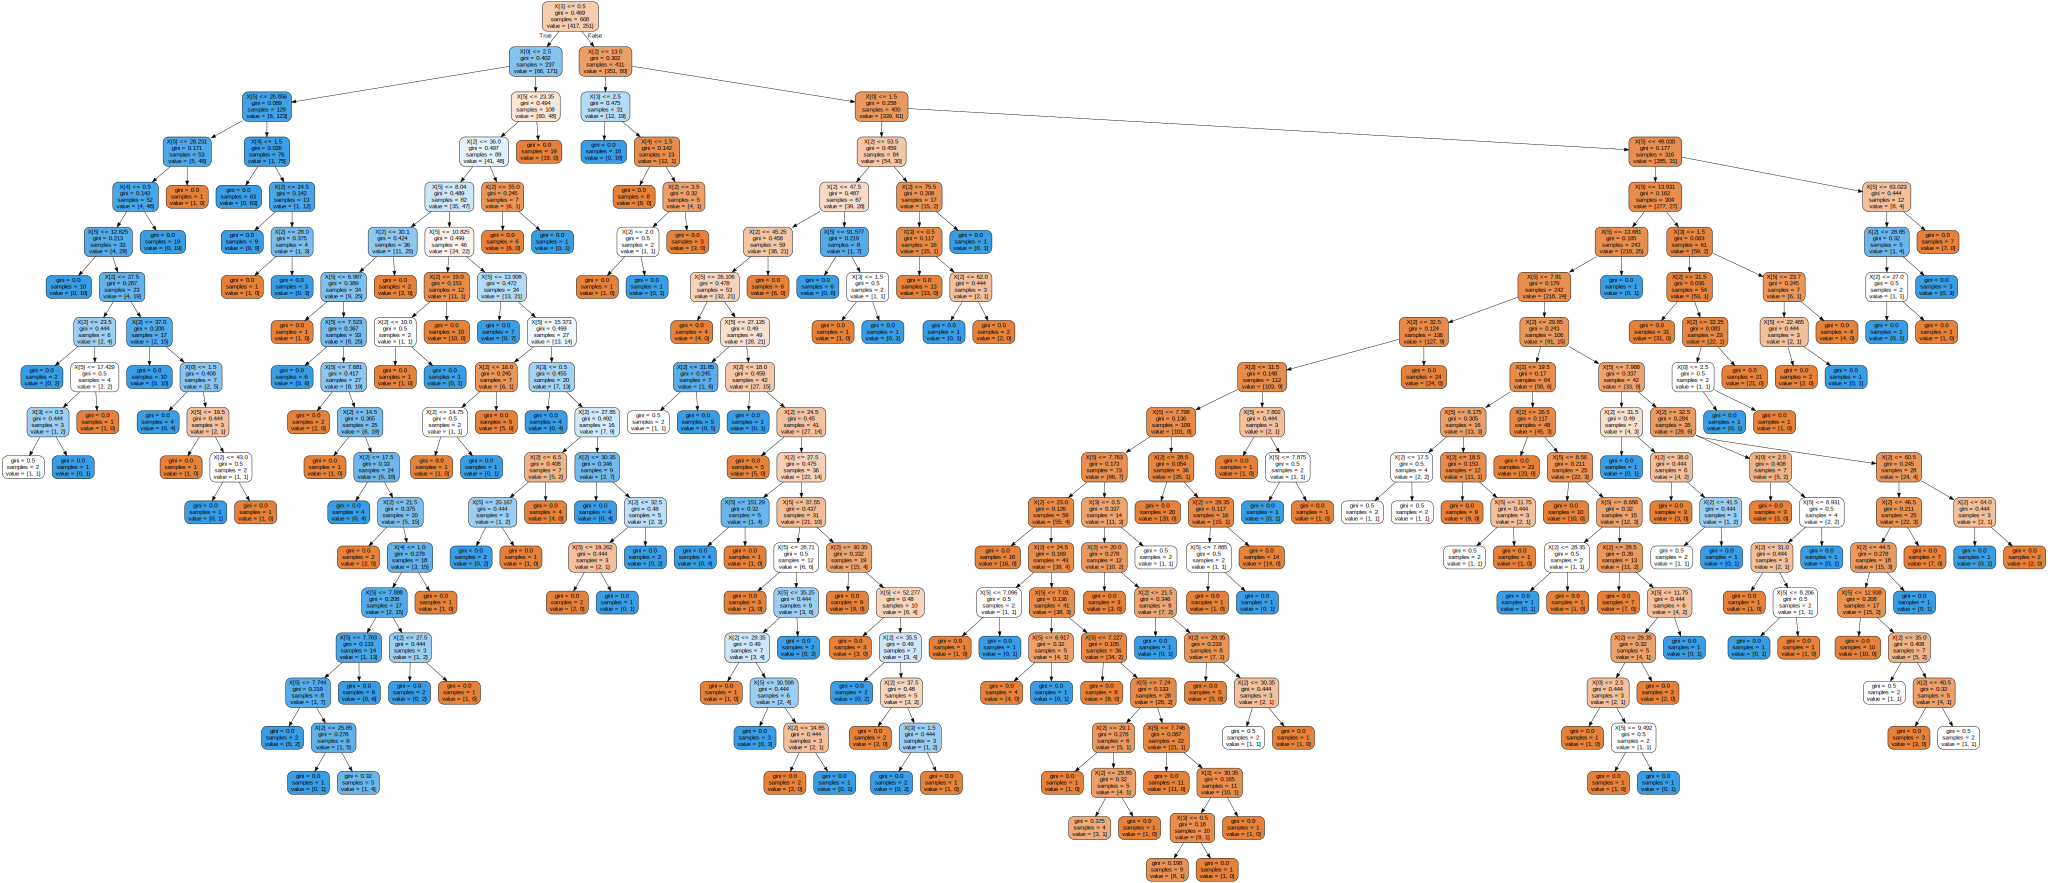

In [30]:
import graphviz as g
dot_data= tree.export_graphviz(dtree,rounded=True,filled=True)
graph=graphviz.Source(dot_data,format='png')
graph.render("Data")
graph 


In [ ]:
# conclusion : what should i here describe ? 

### Changing Parameters of the Decision Tree 

In [12]:
dtree2=tree.DecisionTreeClassifier(min_impurity_decrease=0.01,
                                   max_depth=10,        
                                   min_samples_split=10, 
                                   max_features=None)     # creating a new Tree model with new parameters called 'dtree2'
dtree2.fit(x_train,y_train)                              # fitting the new model with x_train and y_train 
y_pred2=dtree2.predict(x_test)                           # evaluating the new model

### calculation of new Accuracy score 

In [13]:
print("New Score:{}".format(accuracy_score(y_test, y_pred2)))

New Score:0.8161434977578476


### comparaison : 
##### After parameters changes we obtain a new Accuracy Score ,which is higher tha the previous one .

### plotting the new decision tree

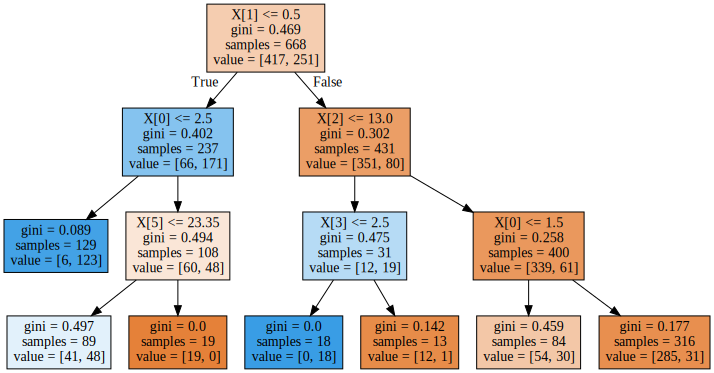

In [14]:
dot_data2 = tree.export_graphviz(dtree2,filled=True)
graph2 = graphviz.Source(dot_data2,format="png")
graph2

### Applying Random Forest Algorithm

In [15]:
# Importing relevant libreries for random forest
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier
from sklearn import metrics                         # Importing metrics to test accuracy

In [16]:
clf=RandomForestClassifier()  # Creating a random forest model with number of estimators by default = 100
clf.fit(x_train, y_train)    # Fitting our model
y_pred3=clf.predict(x_test)  # evaluating our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))  # Measuring the accuracy of our model

Accuracy: 0.7847533632286996


### Applying a new Random Forest changing the number of Estimators

In [18]:
clf2=RandomForestClassifier(n_estimators=10)  # Creating a random forest model with number of estimators = 
clf2.fit(x_train, y_train)                    # Fitting our new model
y_pred4=clf2.predict(x_test)                   # evaluating our new model
print("New Accuracy:", metrics.accuracy_score(y_test, y_pred4))  # Measuring the new accuracy of our model

New Accuracy: 0.7802690582959642


### Comparaison with previous Accuracy value

##### The both accuracy Values of Random forests are pretty the same 